# Curiosities of European Soccer

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This data set from Kaggle brings data of soccer from european leagues, teams and players from 2008 to 2016.
* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship

Some question I will try to answer here in this work:

1. asd


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


Load data for Players from database.sqlite witch is in the same folder of the notebook.
The columns 'overall_rating' and 'penalties' will be used to answer some questions.

In [8]:
players_rating_query = '''
                SELECT DISTINCT player_name, p.player_api_id, date, overall_rating, penalties
                FROM player p JOIN player_attributes pa
                ON p.player_api_id=pa.player_api_id;
                '''

with sqlite3.connect('database.sqlite') as con:
    players = pd.read_sql_query(players_rating_query, con)
    
players.head()    

,player_name,player_api_id,date,overall_rating,penalties
0,Aaron Appindangoye,505942,2016-02-18 00:00:00,67.0,48.0
1,Aaron Appindangoye,505942,2015-11-19 00:00:00,67.0,48.0
2,Aaron Appindangoye,505942,2015-09-21 00:00:00,62.0,48.0
3,Aaron Appindangoye,505942,2015-03-20 00:00:00,61.0,47.0
4,Aaron Appindangoye,505942,2007-02-22 00:00:00,61.0,47.0


Analise the data looking for inconsistences (duplicates, missing values..).

In [9]:
# There are some duplicated values that need to be cleaned.
sum(players.duplicated(subset=['player_api_id']))

172917

In [10]:
# We also have some missing values.
players.isnull().any()

player_name       False
player_api_id     False
date              False
overall_rating     True
penalties          True
dtype: bool

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [ ]:
We will remove the duplicated values keeping the first ones because they are the most updated ones.

In [13]:
players.drop_duplicates(subset=['player_api_id'], inplace=True)
sum(players.duplicated(subset=['player_api_id']))

0

As we found that there are some missing values, we will remove it.

In [14]:
players.dropna(inplace=True)
players.isnull().any()

player_name       False
player_api_id     False
date              False
overall_rating    False
penalties         False
dtype: bool

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Who are the best player on Europe Leagues?

In [75]:
# Sorting by rating and geting the the important values
top_players_rating = players.sort_values(by=['overall_rating'], ascending=False)[:5][['player_name', 'overall_rating']]

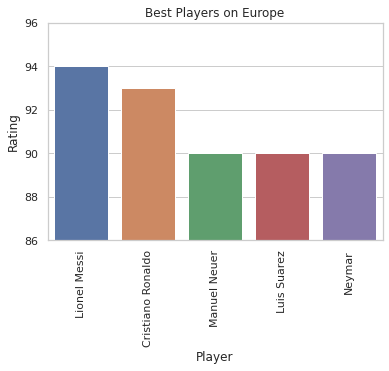

In [76]:
sns.set_theme(style='whitegrid')
fig = sns.barplot(x='player_name', y='overall_rating', data=top_players_rating)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.ylim(86, 96)
fig.set(xlabel='Player', ylabel='Rating', title='Best Players on Europe');

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!